# COVID - 19 Data #

### Source of data: https://ourworldindata.org/covid-vaccinations ###

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
alldata = pd.read_csv('../Data/owid-covid-data.csv')

alldata.tail(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
404440,ZWE,Africa,Zimbabwe,2024-05-17,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
404441,ZWE,Africa,Zimbabwe,2024-05-18,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
404442,ZWE,Africa,Zimbabwe,2024-05-19,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
404443,ZWE,Africa,Zimbabwe,2024-05-20,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
404444,ZWE,Africa,Zimbabwe,2024-05-21,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
404445,ZWE,Africa,Zimbabwe,2024-05-22,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
404446,ZWE,Africa,Zimbabwe,2024-05-23,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
404447,ZWE,Africa,Zimbabwe,2024-05-24,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
404448,ZWE,Africa,Zimbabwe,2024-05-25,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
404449,ZWE,Africa,Zimbabwe,2024-05-26,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [3]:
alldata.shape

(169939, 67)

In [4]:
alldata.total_cases

0              5.0
1              5.0
2              5.0
3              5.0
4              5.0
            ...   
169934    243650.0
169935    243650.0
169936    244012.0
169937    244452.0
169938    244452.0
Name: total_cases, Length: 169939, dtype: float64

In [5]:
lessdata = alldata[['location','date','total_cases','new_cases','total_deaths','new_deaths','total_cases_per_million','total_deaths_per_million','population','total_vaccinations','people_vaccinated','people_fully_vaccinated']]
lessdata.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,population,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.126,NaN,39835428.0,NaN,NaN,NaN
1,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,0.126,NaN,39835428.0,NaN,NaN,NaN
2,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,0.126,NaN,39835428.0,NaN,NaN,NaN
3,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,0.126,NaN,39835428.0,NaN,NaN,NaN
4,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,0.126,NaN,39835428.0,NaN,NaN,NaN


In [6]:
lessdata.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [9]:
usa = lessdata[lessdata.location=='United States']
Tanzania = lessdata[lessdata.location=='Tanzania']
usa = usa.reset_index()
Tanzania = Tanzania.reset_index()
Tanzania.head()

NameError: name 'lessdata' is not defined

In [11]:
fig = plt.figure(figsize=[16,8])
ax1 = fig.add_subplot(1,2,1)
ax1.plot(Tanzania.new_cases[-30:],'blue')
ax1.plot(usa.new_cases[-30:],'red')
ax1.title.set_text("New Cases")

ax2 = fig.add_subplot(1,2,2)
ax2.plot(Tanzania.total_cases_per_million[-30:],'blue')
ax2.plot(usa.total_cases_per_million[-30:],'red')
ax2.title.set_text("Total Cases per Million")
plt.show()


NameError: name 'plt' is not defined

In [13]:
fig = plt.figure(figsize=[16,8])
ax1 = fig.add_subplot(1,2,1)
ax1.plot(Tanzania.new_deaths[-30:],'blue')
ax1.plot(usa.new_deaths[-30:],'red')
ax1.title.set_text("New Deaths")

ax2 = fig.add_subplot(1,2,2)
ax2.plot(Tanzania.total_deaths_per_million[-30:],'blue')
ax2.plot(usa.total_deaths_per_million[-30:],'red')
ax2.title.set_text("Total Deaths per Million")
plt.show()


NameError: name 'plt' is not defined

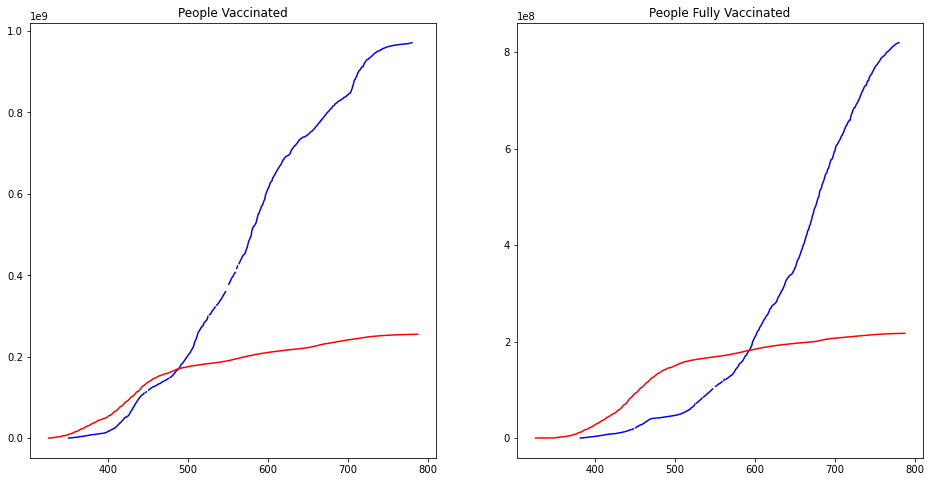

In [16]:
fig = plt.figure(figsize=[16,8])
ax1 = fig.add_subplot(1,2,1)
ax1.plot(Tanzania.people_vaccinated,'blue')
ax1.plot(usa.people_vaccinated,'red')
ax1.title.set_text("People Vaccinated")

ax2 = fig.add_subplot(1,2,2)
ax2.plot(Tanzania.people_fully_vaccinated,'blue')
ax2.plot(usa.people_fully_vaccinated,'red')
ax2.title.set_text("People Fully Vaccinated")
plt.show()
